# Polarización Inducida

## Caso 1 de inversión

In [1]:
import numpy as np 
import pygimli as pg 
from pygimli.physics import ert 
import pygimli.meshtools as mt
import pandas as pd
import seaborn as sns

In [2]:
data = ert.load("datos_ip/schleizTDIP.dat")

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x243c9c3ea00>)

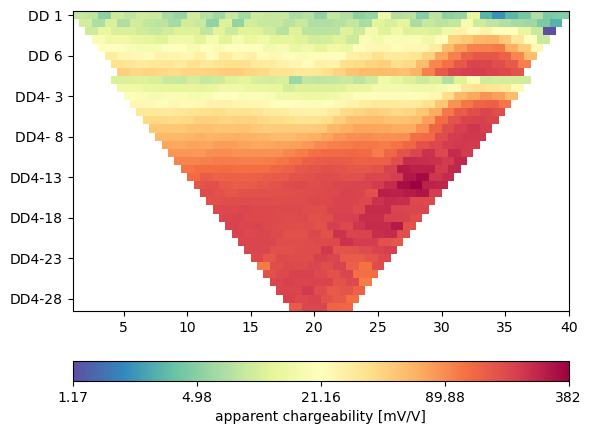

In [3]:
data.show("ip", label="apparent chargeability [mV/V]")

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x243cc0a29d0>)

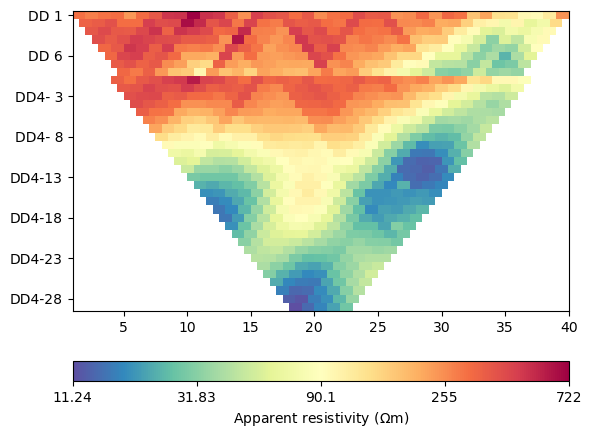

In [4]:
ert.show(data)

In [5]:
data.estimateError()

### Control de calidad

<Axes: ylabel='Count'>

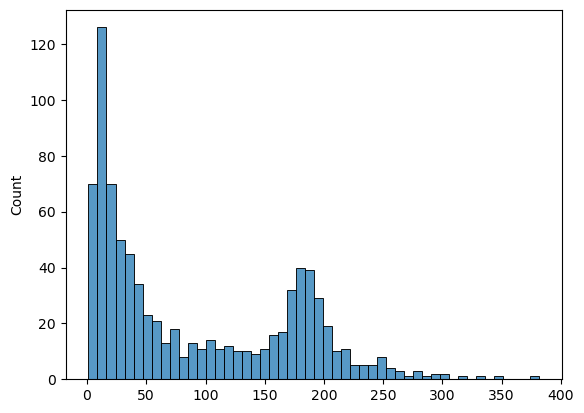

In [8]:
sns.histplot(data["ip"], bins=50)

<Axes: ylabel='Count'>

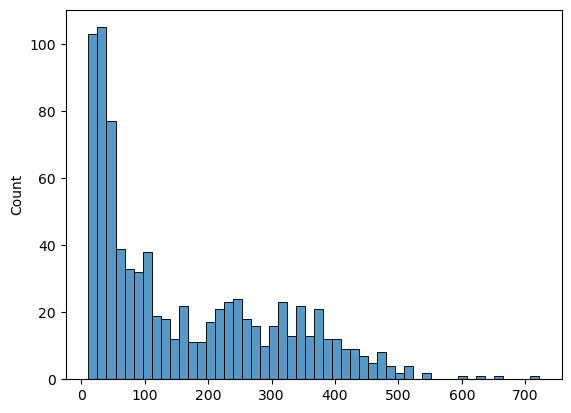

In [9]:
sns.histplot(data["rhoa"], bins=50)

In [10]:
data.remove(data["rhoa"] < 0)
data.remove(data["ip"] < 0)

In [11]:
min(data["rhoa"]), max(data["rhoa"]), min(data["ip"]), max(data["ip"])

(11.2423, 722.0888, 1.1722, 381.82)

### Inversión

In [12]:
mgr = ert.ERTIPManager(data)

In [13]:
mgr.invert(verbose=True)

09/02/24 - 19:56:12 - pyGIMLi - INFO - Found 2 regions.
09/02/24 - 19:56:12 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
09/02/24 - 19:56:12 - pyGIMLi - INFO - Found 2 regions.
09/02/24 - 19:56:12 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
09/02/24 - 19:56:12 - pyGIMLi - INFO - Creating forward mesh from region infos.
09/02/24 - 19:56:12 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
09/02/24 - 19:56:12 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2059 Cells: 3872 Boundaries: 3026
09/02/24 - 19:56:12 - pyGIMLi - INFO - Use median(data values)=105.5424
09/02/24 - 19:56:12 - pyGIMLi - INFO - Created startmodel from forward operator: 724, min/max=105.542400/105.542400
09/02/24 - 19:56:12 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000243CD64CB30>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000243CD64CCC0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000243CD64CD60>
min/max (data): 11.24/722
min/max (error): 3%/3.01%
min/max (start model): 106/106
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1260.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  116.75 (dPhi = 90.30%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   18.33 (dPhi = 82.27%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    1.96 (dPhi = 73.43%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    1.86 (dPhi = 3.21%) lam: 20.0
----------------

09/02/24 - 19:56:23 - pyGIMLi - INFO - Found 1 regions.
09/02/24 - 19:56:23 - pyGIMLi - INFO - Starting inversion.


chi² =    1.77 (dPhi = 1.76%) lam: 20.0
################################################################################
#                Abort criterion reached: dPhi = 1.76 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ipModelling.DCIPMModelling object at 0x00000243CD60F680>
Data transformation: <pgcore._pygimli_.RTrans object at 0x00000243CD5AD700>
Model transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000243CD656220>
min/max (data): 0.0012/0.38
min/max (error): 3.26%/88.31%
min/max (start model): 0.05/0.05
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  497.34
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  159.49 (dPhi = 67.54%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   18.98 (dPhi = 84.23%) lam: 100.

array([<Axes: xlabel='x (m)', ylabel='z (m)'>,
       <Axes: xlabel='x (m)', ylabel='z (m)'>], dtype=object)

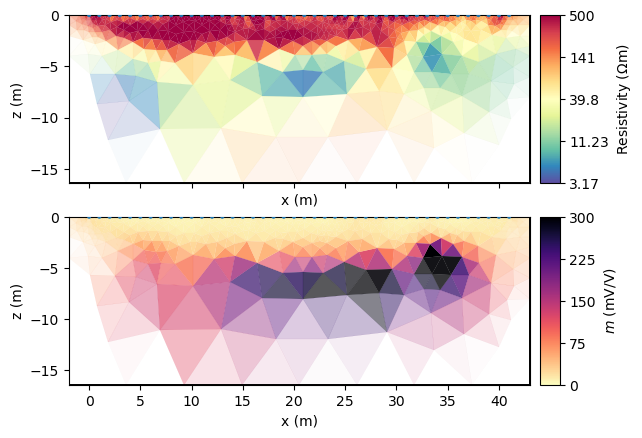

In [16]:
mgr.showResults(reskw={'cMax':500}, ipkw={'cMax':300})

Datasets de práctica: https://zenodo.org/records/4419736